In [191]:
from keras.utils.np_utils import to_categorical
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import time
from sklearn import manifold, cluster, metrics, preprocessing
from sklearn.preprocessing import LabelEncoder


import gensim
import tensorflow as tf
import tensorflow_hub as hub
import transformers

from keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import TFAutoModel, TFBertModel, AutoTokenizer
from PIL import Image

from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.utils import to_categorical

from keras.models import load_model
from keras.layers import GlobalAveragePooling1D
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
import itertools

import cv2
from matplotlib.image import imread






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


 
# Partie 1: Traitement  texte
 

In [3]:
df1 = pd.read_csv("/content/gdrive/MyDrive/flipkart_com-ecommerce_sample_1050.csv")

In [4]:
df1

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [6]:
df1.columns.to_list()

['uniq_id',
 'crawl_timestamp',
 'product_url',
 'product_name',
 'product_category_tree',
 'pid',
 'retail_price',
 'discounted_price',
 'image',
 'is_FK_Advantage_product',
 'description',
 'product_rating',
 'overall_rating',
 'brand',
 'product_specifications']

In [7]:
# Description des données numériques

df1.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [8]:
df1.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [9]:
df1['product_category_tree'].unique()

array(['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
       '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
       '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
       '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
       '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
       '["Watches >> Wrist Watches >> T

In [10]:
a0 = list(df1['product_category_tree'].unique())[0]
a0

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [11]:
a0.split(">>")[0][2:].rstrip(" ")

'Home Furnishing'

In [12]:
product_category_tree_list = list(df1['product_category_tree'].unique())

In [13]:

# Affichage des catégories de produits (principaux)

categories_products_list = [product_category_tree.split(">>")[0][2:].rstrip(" ") for product_category_tree in product_category_tree_list]
categories_products_list

['Home Furnishing',
 'Baby Care',
 'Baby Care',
 'Home Furnishing',
 'Home Furnishing',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Home Furnishing',
 'Home Furnishing',
 'Home Furnishing',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Kitchen & Dining',
 'Home Furnishing',
 'Baby Care',
 'Home Furnishing',
 'Baby Care',
 'Beauty and Personal Care',
 'Kitchen & Dining',
 'Kitchen & Dining',
 'Kitchen & Dining',
 'Computers',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Kitchen & Dining',
 'Computers',
 'Kitchen & Dining',
 'Computers',
 'Computers',
 'Computers',
 'Beauty and Personal Care',
 'Beauty and Personal Care',
 'Beauty and Personal Care',
 'Beauty and Personal Care',
 'Beauty and Personal Care',
 'Baby Care',
 'Kitchen 

In [14]:
# On récupère les catégories uniques

categories_products = set(categories_products_list)
categories_products = list(categories_products)
categories_products

['Beauty and Personal Care',
 'Home Decor & Festive Needs',
 'Home Furnishing',
 'Kitchen & Dining',
 'Baby Care',
 'Watches',
 'Computers']

In [15]:
# Nous retournons la catégorie primaire dans l'arbre des catégories existantes sinon on retourne catégorie non connue

def primary_product_category_tree(block):
    return (block.split(">>")[0][2:].rstrip(" ")) if ((block.split(">>")[0][2:].rstrip(" ")) in categories_products)\
    else "Unknown Category"

In [16]:
df1['primary_product_category_tree_'] = df1['product_category_tree'].apply(primary_product_category_tree)
df1

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,primary_product_category_tree_
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http:/

In [17]:
df1['primary_product_category_tree_'].value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: primary_product_category_tree_, dtype: int64

### Traitement du texte

In [18]:
# Creating a new dataframe with wanted fields

df2 = df1[['uniq_id', 'product_name', 'description', 'primary_product_category_tree_']]
df2

,uniq_id,product_name,description,primary_product_category_tree_
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care


In [19]:
df2['description_'] = df2['product_name'] + " " + df2['description']
df2

<ipython-input-19-91c088a1f102>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['description_'] = df2['product_name'] + " " + df2['description']


,uniq_id,product_name,description,primary_product_category_tree_,description_
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Elegance Polyester Multicolor Abstract Eyelet ...
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Sathiyas Cotton Bath Towel Specifications of S...
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Eurospa Cotton Terry Face Towel Set Key Featur...
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,SANTOSH ROYAL FASHION Cotton Printed King size...
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Jaipur Print Cotton Floral King sized Double B...
...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Oren Empower Extra Large Self Adhesive Sticker...
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Wallmantra Large Vinyl Sticker Sticker Wallman...
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Uberlyfe Extra Large Pigmented Polyvinyl Films...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Wallmantra Medium Vinyl Sticker Sticker Buy Wa...


In [20]:

# Picking up the wanted fields

df3 = df2[['uniq_id', 'description_', 'primary_product_category_tree_']]
df3

,uniq_id,description_,primary_product_category_tree_
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel Specifications of S...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set Key Featur...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker Wallman...,Baby Care
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker Buy Wa...,Baby Care


In [21]:
# picking up one sample randomly

description = df3.description_.sample(1)
description

848    Generix HDMI Female To Female Coupler Jointer ...
Name: description_, dtype: object

In [22]:
description = description.values[0]
description

'Generix HDMI Female To Female Coupler Jointer Adapter Extender Gender Changer gx-hdmi-coupler USB HDMI Connector Buy Generix HDMI Female To Female Coupler Jointer Adapter Extender Gender Changer gx-hdmi-coupler USB HDMI Connector for Rs.166 online. Generix HDMI Female To Female Coupler Jointer Adapter Extender Gender Changer gx-hdmi-coupler USB HDMI Connector at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.'

In [23]:
description = description.lower()
description

'generix hdmi female to female coupler jointer adapter extender gender changer gx-hdmi-coupler usb hdmi connector buy generix hdmi female to female coupler jointer adapter extender gender changer gx-hdmi-coupler usb hdmi connector for rs.166 online. generix hdmi female to female coupler jointer adapter extender gender changer gx-hdmi-coupler usb hdmi connector at best prices with free shipping & cash on delivery. only genuine products. 30 day replacement guarantee.'

In [24]:
# We want to tokenize

token = word_tokenize(description)

# Nombre de token
print(len(token))

# Nombre de token unique
print(len(set(token)))

token

70
35


['generix',
 'hdmi',
 'female',
 'to',
 'female',
 'coupler',
 'jointer',
 'adapter',
 'extender',
 'gender',
 'changer',
 'gx-hdmi-coupler',
 'usb',
 'hdmi',
 'connector',
 'buy',
 'generix',
 'hdmi',
 'female',
 'to',
 'female',
 'coupler',
 'jointer',
 'adapter',
 'extender',
 'gender',
 'changer',
 'gx-hdmi-coupler',
 'usb',
 'hdmi',
 'connector',
 'for',
 'rs.166',
 'online',
 '.',
 'generix',
 'hdmi',
 'female',
 'to',
 'female',
 'coupler',
 'jointer',
 'adapter',
 'extender',
 'gender',
 'changer',
 'gx-hdmi-coupler',
 'usb',
 'hdmi',
 'connector',
 'at',
 'best',
 'prices',
 'with',
 'free',
 'shipping',
 '&',
 'cash',
 'on',
 'delivery',
 '.',
 'only',
 'genuine',
 'products',
 '.',
 '30',
 'day',
 'replacement',
 'guarantee',
 '.']

In [25]:
def token_informations(sentence):
    "Display tokens information"
    print(f"Nombre de tokens : {len(sentence)}, nombre de tokens uniques : {len(set(sentence))}\n")
    print(sentence[:50])

In [26]:
token_informations(token)

Nombre de tokens : 70, nombre de tokens uniques : 35

['generix', 'hdmi', 'female', 'to', 'female', 'coupler', 'jointer', 'adapter', 'extender', 'gender', 'changer', 'gx-hdmi-coupler', 'usb', 'hdmi', 'connector', 'buy', 'generix', 'hdmi', 'female', 'to', 'female', 'coupler', 'jointer', 'adapter', 'extender', 'gender', 'changer', 'gx-hdmi-coupler', 'usb', 'hdmi', 'connector', 'for', 'rs.166', 'online', '.', 'generix', 'hdmi', 'female', 'to', 'female', 'coupler', 'jointer', 'adapter', 'extender', 'gender', 'changer', 'gx-hdmi-coupler', 'usb', 'hdmi', 'connector']


In [27]:
# Other way to tokenize

wordpunct_token_ = wordpunct_tokenize(description)
wordpunct_token_


['generix',
 'hdmi',
 'female',
 'to',
 'female',
 'coupler',
 'jointer',
 'adapter',
 'extender',
 'gender',
 'changer',
 'gx',
 '-',
 'hdmi',
 '-',
 'coupler',
 'usb',
 'hdmi',
 'connector',
 'buy',
 'generix',
 'hdmi',
 'female',
 'to',
 'female',
 'coupler',
 'jointer',
 'adapter',
 'extender',
 'gender',
 'changer',
 'gx',
 '-',
 'hdmi',
 '-',
 'coupler',
 'usb',
 'hdmi',
 'connector',
 'for',
 'rs',
 '.',
 '166',
 'online',
 '.',
 'generix',
 'hdmi',
 'female',
 'to',
 'female',
 'coupler',
 'jointer',
 'adapter',
 'extender',
 'gender',
 'changer',
 'gx',
 '-',
 'hdmi',
 '-',
 'coupler',
 'usb',
 'hdmi',
 'connector',
 'at',
 'best',
 'prices',
 'with',
 'free',
 'shipping',
 '&',
 'cash',
 'on',
 'delivery',
 '.',
 'only',
 'genuine',
 'products',
 '.',
 '30',
 'day',
 'replacement',
 'guarantee',
 '.']

In [28]:
token_informations(wordpunct_token_)

Nombre de tokens : 84, nombre de tokens uniques : 37

['generix', 'hdmi', 'female', 'to', 'female', 'coupler', 'jointer', 'adapter', 'extender', 'gender', 'changer', 'gx', '-', 'hdmi', '-', 'coupler', 'usb', 'hdmi', 'connector', 'buy', 'generix', 'hdmi', 'female', 'to', 'female', 'coupler', 'jointer', 'adapter', 'extender', 'gender', 'changer', 'gx', '-', 'hdmi', '-', 'coupler', 'usb', 'hdmi', 'connector', 'for', 'rs', '.', '166', 'online', '.', 'generix', 'hdmi', 'female', 'to', 'female']


In [29]:

# Other way to tokenize with stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)

{'now', 'am', 'through', 'hers', 'of', 'what', 'yourself', 'most', "couldn't", 'he', 'd', 'for', "you'll", 'during', 'me', 'mightn', 'our', 'that', 'ourselves', 'is', 'won', 'with', 'being', 'by', 'who', 'do', 'only', 'don', 'such', 'then', 'has', 'the', 'there', 'did', "shan't", 'she', 'a', 'its', 'between', 'where', 'does', "hadn't", "should've", 't', 'here', 'isn', 'over', 'couldn', 'against', "shouldn't", "needn't", "mustn't", 'any', 'down', 'above', 'can', 'it', 'were', 'having', 'theirs', 're', 'didn', 'just', 'on', 'y', 'very', 'if', 'off', "hasn't", 'be', 'in', 'no', 'myself', 'wasn', 'weren', "won't", 'o', 'haven', 'have', 'whom', "wasn't", "don't", 'why', 'm', 'own', 'which', 'yourselves', 'while', 'his', 'ours', "doesn't", 'ma', 'few', "it's", "didn't", 'wouldn', 'but', "wouldn't", 's', 'because', "weren't", 'her', 'and', "she's", 'out', 'was', 'into', 'other', 'him', 'these', 'each', 'hadn', 'shan', 'you', 'or', "that'll", 've', 'before', 'are', 'than', 'nor', 'himself', 'a

In [30]:
# We remove from wordpunkt_token_ all the stopwords in the list above

wordpunct_token_ = [word for word in wordpunct_token_ if word not in stop_words]

In [31]:

# As we can see we have less words

token_informations(wordpunct_token_)

Nombre de tokens : 76, nombre de tokens uniques : 31

['generix', 'hdmi', 'female', 'female', 'coupler', 'jointer', 'adapter', 'extender', 'gender', 'changer', 'gx', '-', 'hdmi', '-', 'coupler', 'usb', 'hdmi', 'connector', 'buy', 'generix', 'hdmi', 'female', 'female', 'coupler', 'jointer', 'adapter', 'extender', 'gender', 'changer', 'gx', '-', 'hdmi', '-', 'coupler', 'usb', 'hdmi', 'connector', 'rs', '.', '166', 'online', '.', 'generix', 'hdmi', 'female', 'female', 'coupler', 'jointer', 'adapter', 'extender']


In [32]:
# Best way to tokenize a description


reg_token = RegexpTokenizer("\w+").tokenize(description)
token_informations(reg_token)


Nombre de tokens : 72, nombre de tokens uniques : 34

['generix', 'hdmi', 'female', 'to', 'female', 'coupler', 'jointer', 'adapter', 'extender', 'gender', 'changer', 'gx', 'hdmi', 'coupler', 'usb', 'hdmi', 'connector', 'buy', 'generix', 'hdmi', 'female', 'to', 'female', 'coupler', 'jointer', 'adapter', 'extender', 'gender', 'changer', 'gx', 'hdmi', 'coupler', 'usb', 'hdmi', 'connector', 'for', 'rs', '166', 'online', 'generix', 'hdmi', 'female', 'to', 'female', 'coupler', 'jointer', 'adapter', 'extender', 'gender', 'changer']


In [33]:
def reg_tokenizer(sentence, rejoin = False):
    sentence = sentence.lower()

    tokenized_sentence = RegexpTokenizer("\w+").tokenize(sentence)
    stop_words = set(stopwords.words("english"))

    tokenized_sentence = [word for word in tokenized_sentence if word not in stop_words]

    if rejoin:
        return " ".join(tokenized_sentence)

    return tokenized_sentence

In [34]:
# We join now all the corpus description

corpus = " ".join(df3.description_)
corpus

'Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant

In [35]:
corpus_tokenized = reg_tokenizer(corpus)
token_informations(corpus_tokenized)

Nombre de tokens : 68979, nombre de tokens uniques : 5966

['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', '100', 'high', 'quality', 'polyester', 'fabric', 'features', 'eyelet', 'style', 'stitch', 'metal', 'ring']


In [36]:
occur = pd.Series(corpus_tokenized).value_counts()
occur


rs           911
cm           652
products     633
free         622
buy          582
            ... 
sale           1
spacious       1
notepad        1
organiser      1
pgrn01         1
Length: 5966, dtype: int64

In [37]:
# List of words which appear once

one_occur = occur[occur == 1]
one_occur

objects      1
mrsa         1
239          1
testimony    1
permanat     1
            ..
sale         1
spacious     1
notepad      1
organiser    1
pgrn01       1
Length: 1502, dtype: int64

In [38]:
# List of words which appears at least 5 times or less

five_occur = occur[occur <= 5]
five_occur

mb003ja       5
roronoa       5
lipstick      5
protection    5
snap          5
             ..
sale          1
spacious      1
notepad       1
organiser     1
pgrn01        1
Length: 4267, dtype: int64

In [39]:
# List of words which appears 10 times or less

ten_occur = occur[occur <= 10]
ten_occur

310           10
taste         10
ft            10
experience    10
pass          10
              ..
sale           1
spacious       1
notepad        1
organiser      1
pgrn01         1
Length: 5003, dtype: int64

In [40]:
# List of words which appears 30 times or less

thirty_occur = occur[occur <= 30]
thirty_occur

time         30
keep         30
flat         30
iron         30
statue       30
             ..
sale          1
spacious      1
notepad       1
organiser     1
pgrn01        1
Length: 5576, dtype: int64

In [41]:
def description_tokenizer (descriptions,
                          rejoin = False,
                          stemmentize = "s",
                          rare_occur = None,
                          min_lenght_word = 3,
                          alphanumeric_token = True,
                          english_tokens = True):

    """

    positional arguments :
      - doc (str): text to process


    optional arguments :
      - rejoin (bool): if True returna sentence else return a list of tokens
      - 's' or 'l' (str): if s stemmentize else lemmentize
      - rare_occur (list): a list of rare words to exclude
      - min_lenght_word (int): the minimum length for a word
      - alphanumeric_token (int): if 1, exclude all tokens with a numeric character
      - english_tokens (bool): if True only english words else another language


    return :
      - list of tokens or a string if rejoin=True

    """

    # Significant token is a list of token which have enough weight in corpus
    # if there is no rare_occur list, then this list will be empty

    # lower
    descriptions = descriptions.lower().strip()

    # tokenize
    raw_tokens_list = RegexpTokenizer("\w+").tokenize(descriptions)

    # classics stopwords
    tokens_list_no_stopwords = [w for w in raw_tokens_list if w not in stop_words]


    #######################################################


    # no rare tokens
    significant_tokens = [w for w in tokens_list_no_stopwords if w not in rare_occur]

    # no more len word
    min_lenght_tokens = [w for w in significant_tokens if len(w) >= min_lenght_word]

    # only alpha chars
    if alphanumeric_token:
        alpha_numeric_tokens = [w for w in min_lenght_tokens if w.isalpha()]
    else:
        alpha_numeric_tokens = min_lenght_tokens


    ########################################################


    if stemmentize == "s":
        transformed_tokens = [PorterStemmer().stem(w) for w in alpha_numeric_tokens]
    else:
        transformed_tokens = [WordNetLemmatizer().lemmatize(w) for w in alpha_numeric_tokens]


    ########################################################


    # List of english words
    list_eng_words = words.words()

    if english_tokens:
        eng_tokens = [w for w in transformed_tokens if w in list_eng_words]
    else :
        eng_tokens = transformed_tokens


    ########################################################


    # return a list or a string
    if rejoin :
        return " ".join(eng_tokens)

    return eng_tokens


In [42]:
corpus_tokenized_ = description_tokenizer(corpus,
                                          rare_occur = one_occur.index,
                                          rejoin = False)

token_informations(corpus_tokenized_)

Nombre de tokens : 37454, nombre de tokens uniques : 1561

['multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'key', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'look', 'interior', 'curtain', 'made', 'high', 'fabric', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environ', 'curtain', 'ant', 'anti', 'give', 'home', 'bright', 'appeal', 'design', 'attent', 'sure', 'eyelet', 'curtain', 'slide', 'draw']


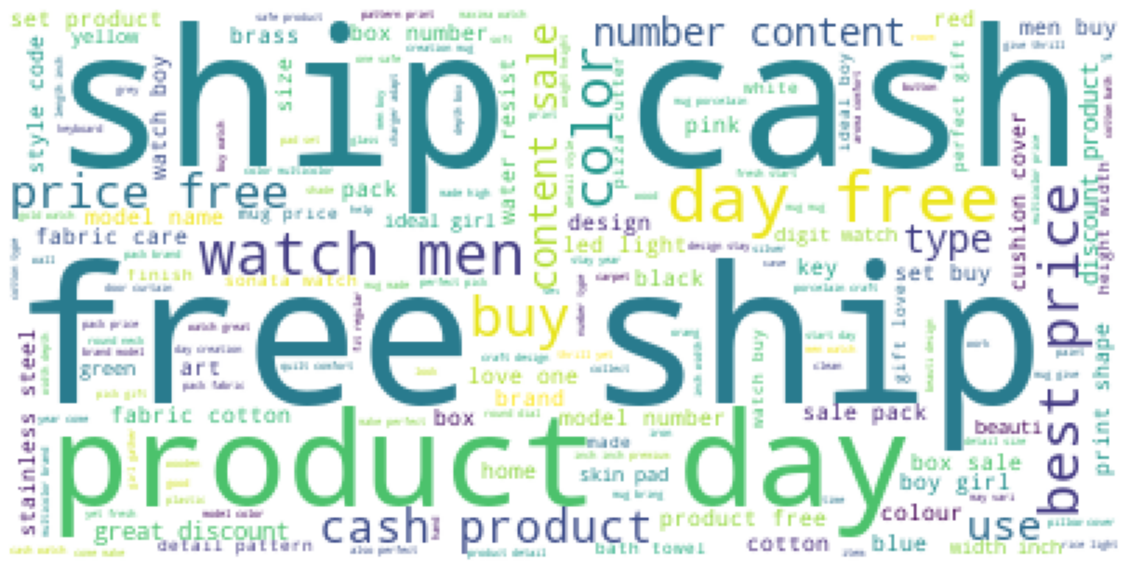

In [43]:
word_cloud = WordCloud(background_color = "white",
               stopwords=[],
               max_words=200).generate(" ".join(corpus_tokenized_))
fig = plt.subplots(figsize=(20,20))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [44]:
df3['processed_description'] = df3['description_'].apply(lambda x: description_tokenizer(x,
                                                                                         True,
                                                                                         "s",
                                                                                         [],
                                                                                         True,
                                                                                         True))
df3

<ipython-input-44-0f7a751153a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['processed_description'] = df3['description_'].apply(lambda x: description_tokenizer(x,


,uniq_id,description_,primary_product_category_tree_,processed_description
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,multicolor abstract eyelet door curtain key mu...
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel Specifications of S...,Baby Care,cotton bath towel cotton bath towel bath towel...
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set Key Featur...,Baby Care,cotton face towel set key cotton face towel se...
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,royal fashion cotton print king size key royal...
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,print cotton floral king size key print cotton...
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,extra self sticker extra self sticker pack pri...
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker Wallman...,Baby Care,vinyl sticker sticker vinyl sticker sticker pa...
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Baby Care,extra pigment polyvinyl film import sticker bu...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker Buy Wa...,Baby Care,medium vinyl sticker sticker buy medium vinyl ...


In [45]:
df3['product_description_lenght'] = df3['description_'].apply(lambda x: len(x))
df3['processed_description_lenght'] = df3['processed_description'].apply(lambda x: len(x))
df3

,uniq_id,description_,primary_product_category_tree_,processed_description,product_description_lenght,processed_description_lenght
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,multicolor abstract eyelet door curtain key mu...,1479,761
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel Specifications of S...,Baby Care,cotton bath towel cotton bath towel bath towel...,471,278
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set Key Featur...,Baby Care,cotton face towel set key cotton face towel se...,1294,646
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,royal fashion cotton print king size key royal...,922,533
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,print cotton floral king size key print cotton...,1251,680
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,extra self sticker extra self sticker pack pri...,2479,848
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker Wallman...,Baby Care,vinyl sticker sticker vinyl sticker sticker pa...,1699,700
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Baby Care,extra pigment polyvinyl film import sticker bu...,328,173
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker Buy Wa...,Baby Care,medium vinyl sticker sticker buy medium vinyl ...,250,128


#
# Préparation commune des traitements

In [46]:
# We display unique category

categ = list(set(df3['primary_product_category_tree_']))
print("The unique category type are : ", categ)

The unique category type are :  ['Beauty and Personal Care', 'Home Decor & Festive Needs', 'Home Furnishing', 'Kitchen & Dining', 'Baby Care', 'Watches', 'Computers']


In [47]:
category_number = [(1-categ.index(df3.iloc[i]['primary_product_category_tree_'])) for i in range(len(df3))]
category_number

[-1,
 -3,
 -3,
 -1,
 -1,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -1,
 -1,
 -1,
 0,
 -2,
 -2,
 -1,
 -3,
 -1,
 -3,
 1,
 -2,
 -2,
 -2,
 -5,
 -2,
 1,
 -2,
 -5,
 -2,
 -5,
 -5,
 -5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -3,
 -2,
 -2,
 -3,
 -1,
 -2,
 -2,
 -2,
 -1,
 -2,
 -3,
 -3,
 -3,
 1,
 1,
 -1,
 -3,
 0,
 0,
 -3,
 -3,
 0,
 0,
 -2,
 -5,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 -1,
 -3,
 -1,
 -1,
 -1,
 -3,
 0,
 -3,
 -2,
 -3,
 -5,
 0,
 -3,
 0,
 -5,
 -1,
 -3,
 -5,
 0,
 1,
 1,
 1,
 1,
 0,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 0,
 0,
 0,
 0,
 -2,
 0,
 -2,
 0,
 0,
 -3,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0

#
# Bag of word TF - IDF

In [48]:
tf_idf_ = TfidfVectorizer(stop_words = 'english',
                      max_df = 0.95,
                      min_df = 1)

tf_idf_fitted = tf_idf_.fit(df3['processed_description'])
tf_idf_transformed = tf_idf_.transform(df3['processed_description'])

In [49]:
count_vect = CountVectorizer(stop_words = 'english',
                        max_df = 0.95,
                        min_df = 1)

count_vect_fit = count_vect.fit(df3['processed_description'])
count_vect_transform = count_vect.transform(df3['processed_description'])

In [50]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters

def ARI_funct(features) :
    time1 = time.time()
    num_labels = len(categ)
    tsne = manifold.TSNE(n_components = 2,
                         perplexity = 30,
                         n_iter = 2000,
                         init = 'random',
                         learning_rate = 200,
                         random_state = 50)

    X_tsne = tsne.fit_transform(features)


    # Détermination des clusters à partir des données après Tsne

    clust_km = cluster.KMeans(n_clusters = num_labels,
                         n_init = 100,
                         random_state = 50)
    clust_km.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(category_number, clust_km.labels_),4)
    time2 = np.round(time.time() - time1, 0)
    print("ARI : ", ARI, "time : ", time2)

    return ARI, X_tsne, clust_km.labels_



# visualisation du Tsne selon les vraies catégories et selon les clusters

def TSNE_display(ARI, X_tsne, category_number, labels) :
    fig = plt.figure(figsize = (15,6))

    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c = category_number, cmap = 'Set1')

    ax.legend(handles = scatter.legend_elements()[0],
              labels = categ,
              loc = "best",
              title = "Category")

    plt.title('Représentation des produits par catégories réelles')

    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles = scatter.legend_elements()[0],
              labels = set(labels),
              loc = "best",
              title = "Clusters")

    plt.title('Représentation des produits par clusters')

    plt.show()
    print("ARI : ", ARI)

In [51]:
# We launch the tf-idf model

print("Tf-idf : ")
print("          ")
ARI, X_tsne, labels = ARI_funct(tf_idf_transformed)


Tf-idf : 
          
ARI :  0.3868 time :  19.0


In [52]:
# We launch the model

print("Count_vect : ")
print("          ")
ARI_1, X_tsne_1, labels_1 = ARI_funct(count_vect_transform)

Count_vect : 
          
ARI :  0.3637 time :  19.0


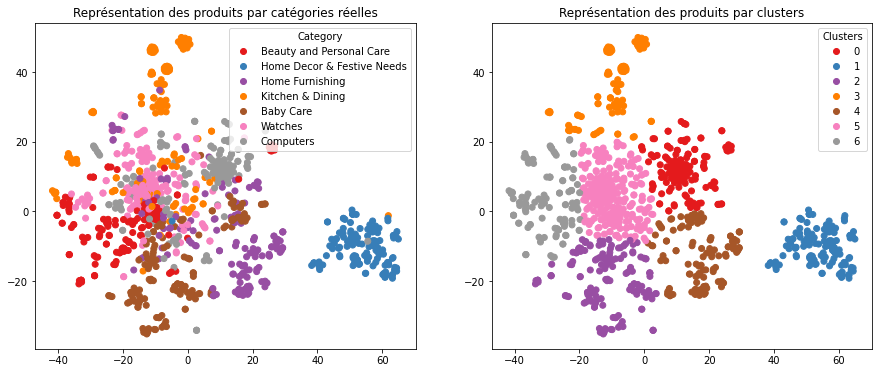

ARI :  0.3637


In [53]:
# We display the graph
TSNE_display(ARI_1, X_tsne_1, category_number, labels_1)

#
# Word2Vec

In [54]:
# Création du modèle

w2v_size = 300
w2v_window = 5
w2v_min_count = 1
w2v_epochs = 100
max_lenght = 24
sentences = df3['processed_description'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [55]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count = w2v_min_count,
                                   window = w2v_window,
                                   vector_size = w2v_size,
                                   seed = 42,
                                   workers = 1)

# workers = multiprocessing.cpu_count())

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples = w2v_model.corpus_count, epochs = w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 1951
Word2Vec trained


In [56]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                            maxlen = max_lenght,
                            padding = 'post')

num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 1952


In [57]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i = 0
j = 0

for word, idx in word_index.items():
    i += 1
    if word in w2v_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.round(j/i, 4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (1952, 300)


In [58]:
# embedding model design

input = tf.keras.Input(shape = (len(x_sentences), max_lenght),
              dtype='float64')

word_input = tf.keras.Input(shape = (max_lenght,),dtype='float64')
word_embedding = Embedding(input_dim = vocab_size,
                           output_dim = w2v_size,
                           weights = [embedding_matrix],
                           input_length = max_lenght)(word_input)

word_vec = GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           585600    
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 585,600
Trainable params: 585,600
Non-trainable params: 0
_________________________________________________________________


In [59]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 2ms/step


(1050, 300)

In [60]:
ARI_2, X_tsne_2, labels_2 = ARI_funct(embeddings)

ARI :  0.3242 time :  17.0


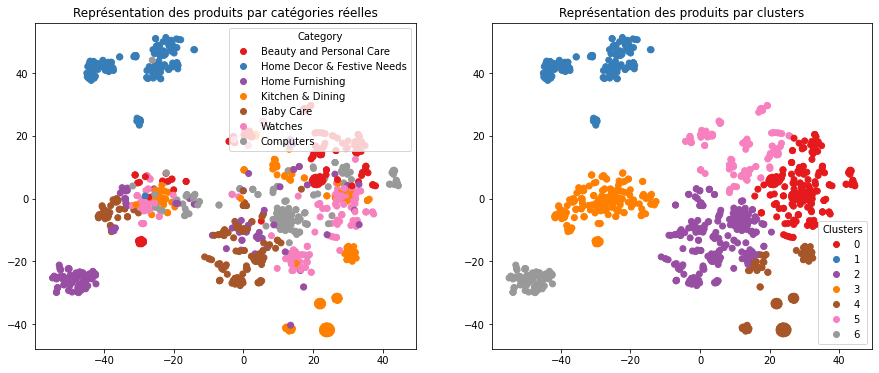

ARI :  0.3242


In [61]:
TSNE_display(ARI_2, X_tsne_2, category_number, labels_2)

### BERT

In [62]:
print(f"Tensor Flow Version : {tf.__version__}")
#print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(f"Tensor Flow Test is built with CUDA :{tf.test.is_built_with_cuda()}")

Tensor Flow Version : 2.11.0
Num GPUs Available:  0
Tensor Flow Test is built with CUDA :True


### Fonctions communes

In [63]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True,
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")

        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0],
                             bert_inp['token_type_ids'][0],
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)

    return input_ids, token_type_ids, attention_mask, bert_inp_tot


# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size],
                                                                               bert_tokenizer, max_length)

        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids,
                                 "input_mask" : attention_mask,
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']

        if step == 0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))

    features_bert = np.array(last_hidden_states_tot).mean(axis=1)

    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)

    return features_bert, last_hidden_states_tot

### BERT Base Uncased

In [64]:
# Creation du modele
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df3['processed_description'].to_list()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [65]:
# Création des features
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 2s 2s/step
temps traitement :  340.0


In [66]:
ARI_3, X_tsne_3, labels_3 = ARI_funct(features_bert)

ARI :  0.3026 time :  22.0


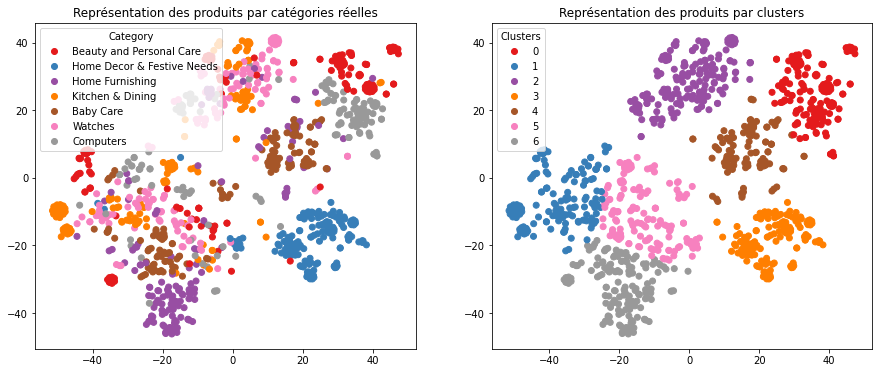

ARI :  0.3026


In [67]:
TSNE_display(ARI_3, X_tsne_3, category_number, labels_3)

### USE : Universal Sentence Encoder (Sentence Embedding)

In [68]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model_u = hub.load(module_url)
print('module %s is loaded' % module_url)


module https://tfhub.dev/google/universal-sentence-encoder/4 is loaded


In [69]:
def USE_funct(sentences, batch_s):
  batch_size = batch_s
  time_1 = time.time()

  for p in range(len(sentences)//batch_size):
    id = p * batch_size
    featur = model_u(sentences[id:id+batch_size])
    if p == 0:
      features = featur
    else:
      features = np.concatenate((features, featur))
    
  time2 = np.round(time.time() - time_1, 0)
  return features

In [70]:
batch_size = 10
sentences = df3['processed_description'].to_list()
df3['processed_description']

0       multicolor abstract eyelet door curtain key mu...
1       cotton bath towel cotton bath towel bath towel...
2       cotton face towel set key cotton face towel se...
3       royal fashion cotton print king size key royal...
4       print cotton floral king size key print cotton...
                              ...                        
1045    extra self sticker extra self sticker pack pri...
1046    vinyl sticker sticker vinyl sticker sticker pa...
1047    extra pigment polyvinyl film import sticker bu...
1048    medium vinyl sticker sticker buy medium vinyl ...
1049    vinyl sticker buy vinyl sticker vinyl sticker ...
Name: processed_description, Length: 1050, dtype: object

In [71]:
feat_USE = USE_funct(sentences, batch_size) 
feat_USE

array([[-0.05516072, -0.05642081,  0.03813699, ...,  0.0032075 ,
         0.02697111, -0.04067305],
       [-0.03241124, -0.02986513, -0.00692979, ...,  0.03106062,
         0.01918461,  0.03198217],
       [-0.05261781, -0.04170449, -0.03548542, ...,  0.04774963,
        -0.03147292, -0.01214684],
       ...,
       [ 0.03095726, -0.04951795,  0.06482908, ..., -0.06018888,
         0.04712489, -0.06419197],
       [-0.00482113, -0.01496991,  0.05728043, ...,  0.00436106,
        -0.03680334, -0.00559375],
       [-0.01727088, -0.02229776,  0.06380153, ...,  0.02651049,
        -0.02965057,  0.01707593]], dtype=float32)

In [72]:
ARI_4, X_tsne_4, labels_4 = ARI_funct(feat_USE)

ARI :  0.42 time :  17.0


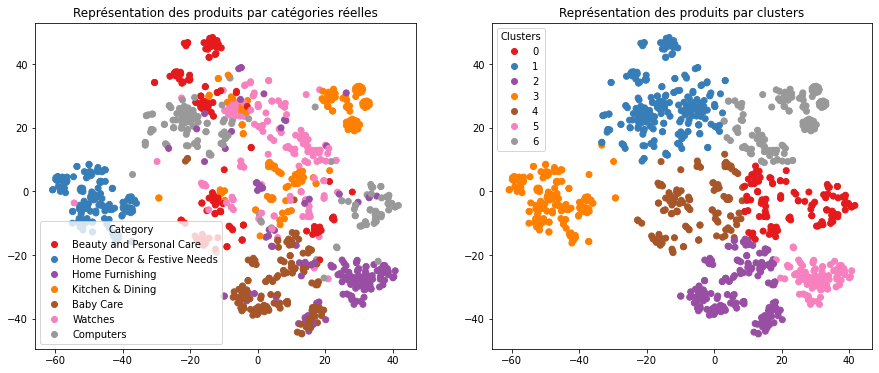

ARI :  0.42


In [73]:
TSNE_display(ARI_4, X_tsne_4, category_number, labels_4 ) 

 
# Partie 2: Traitement de l'image
 

In [74]:
df1

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,primary_product_category_tree_
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http:/

In [75]:
df3

,uniq_id,description_,primary_product_category_tree_,processed_description,product_description_lenght,processed_description_lenght
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,multicolor abstract eyelet door curtain key mu...,1479,761
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel Specifications of S...,Baby Care,cotton bath towel cotton bath towel bath towel...,471,278
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set Key Featur...,Baby Care,cotton face towel set key cotton face towel se...,1294,646
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,royal fashion cotton print king size key royal...,922,533
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,print cotton floral king size key print cotton...,1251,680
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,extra self sticker extra self sticker pack pri...,2479,848
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker Wallman...,Baby Care,vinyl sticker sticker vinyl sticker sticker pa...,1699,700
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Baby Care,extra pigment polyvinyl film import sticker bu...,328,173
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker Buy Wa...,Baby Care,medium vinyl sticker sticker buy medium vinyl ...,250,128


In [76]:
df4 = df1[['image', 'primary_product_category_tree_']]
df4

,image,primary_product_category_tree_
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care


### Categorial data encoding

In [77]:
df5 = preprocessing.LabelEncoder().fit_transform(df4['primary_product_category_tree_'])
df5

array([4, 0, 0, ..., 0, 0, 0])

In [78]:
path = '/content/gdrive/MyDrive/Images/'

In [79]:
df4[df4['image']=='0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg']

,image,primary_product_category_tree_
625,0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg,Home Decor & Festive Needs


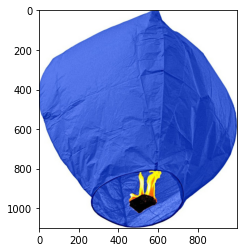

In [80]:
item_image = imread(path + '0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg')
plt.imshow(item_image)
plt.show()

###
### List product by category

In [81]:

Home_Furnishing_images = df4[df4['primary_product_category_tree_'] == 'Home Furnishing']['image']
Baby_Care_images = df4[df4['primary_product_category_tree_'] == 'Baby Care']['image']
Watches_images = df4[df4['primary_product_category_tree_'] == 'Watches']['image']
Home_Decor_Festive_Needs_images = df4[df4['primary_product_category_tree_'] == 'Home Decor & Festive Needs']['image']
Kitchen_Dining_images = df4[df4['primary_product_category_tree_'] == 'Kitchen & Dining']['image']
Beauty_and_Personal_Care_images = df4[df4['primary_product_category_tree_'] == 'Beauty and Personal Care']['image']
Computers_images = df4[df4['primary_product_category_tree_'] == 'Computers']['image']

In [82]:
Labeled_images = '/content/gdrive/MyDrive/Labeled_images/'

In [83]:
Home_Furnishing_images.to_csv(Labeled_images + "Home_Furnishing_images.csv")
Baby_Care_images.to_csv(Labeled_images + "Baby_Care_images.csv")
Beauty_and_Personal_Care_images.to_csv(Labeled_images + "Beauty_and_Personal_Care_images.csv")
Computers_images.to_csv(Labeled_images + "Computers_images.csv")
Home_Decor_Festive_Needs_images.to_csv(Labeled_images + "Home_Decor_and_Festive_Needs_images.csv")
Kitchen_Dining_images.to_csv(Labeled_images + "Kitchen_and_Dining_images.csv")
Watches_images.to_csv(Labeled_images + "Watches_images.csv")


In [84]:
def item_category(category_name):
    return df4[df4['primary_product_category_tree_'] == category_name]['image'].to_list()

In [85]:
Watches_images

5      893aa5ed55f7cff2eccea7758d7a86bd.jpg
6      f355cc1ccb08bd0d283ed979b7ee7515.jpg
7      dd0e3470a7e6ed76fd69c2da27721041.jpg
8      41384da51732c0b4df3de8f395714fbb.jpg
9      710ed5f2393a4b9e8823aa0029f71f93.jpg
                       ...                 
796    170fdf050c7a1f8d30ef5a98c4216f9c.jpg
823    697ad1d2e45c1af54cab7847cbe324d8.jpg
825    3a7b224bf1bc9cee9052f9c9df0355f6.jpg
826    700dfd088162ea00deda33123cd7f2da.jpg
913    89b95537d8697203ab278237289a52a8.jpg
Name: image, Length: 150, dtype: object

In [86]:
item_category('Watches')

['893aa5ed55f7cff2eccea7758d7a86bd.jpg',
 'f355cc1ccb08bd0d283ed979b7ee7515.jpg',
 'dd0e3470a7e6ed76fd69c2da27721041.jpg',
 '41384da51732c0b4df3de8f395714fbb.jpg',
 '710ed5f2393a4b9e8823aa0029f71f93.jpg',
 '920154acbe49d3202ed7d2ed2df1ea13.jpg',
 '08452abdadb3db1e686b94a9c52fc7b6.jpg',
 '1e8741b5ae27a513546c94b3f3312aee.jpg',
 '189fa66a5fa6f08d2802a62ecf0be298.jpg',
 'bbb8cdc5406ff60ff06ff64630f2ca47.jpg',
 '1120bc768623572513df956172ffefeb.jpg',
 '5479bb7028827d60000720a2c135976a.jpg',
 '733aa1e801a139fa8dc7be9f0eff5ee0.jpg',
 '62c35de4df27437d3597963fac55a8b6.jpg',
 '33d97d63c037078cd3f08033966d6a88.jpg',
 'd7ca2b06b4f4d3b98c61c377b18a2d6b.jpg',
 'f74476ba64365d97a5be7d375cbf4c7a.jpg',
 'fda50982a672ef8835de5c1cc86f8bfc.jpg',
 '4788f5466992da09024b8ffcc8a5cba4.jpg',
 '653826cd53f1d9e2c086c0ac7846ef70.jpg',
 '3c74db45cbfc14a78b8466dca494b3bb.jpg',
 '4aa047f14885c74f155ce5f973e14dff.jpg',
 '7c4fec2331da8d40f2cb146eb198cb57.jpg',
 'b52073e7ed9c00c4108cae4eb0c49c1a.jpg',
 'ee8d9ff65e0fe4

In [87]:
categories_products

['Beauty and Personal Care',
 'Home Decor & Festive Needs',
 'Home Furnishing',
 'Kitchen & Dining',
 'Baby Care',
 'Watches',
 'Computers']

Beauty and Personal Care


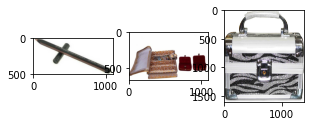

Home Decor & Festive Needs


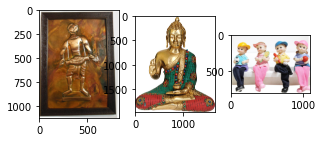

Home Furnishing


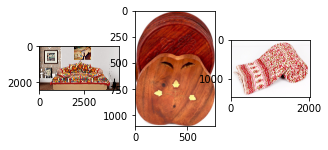

Kitchen & Dining


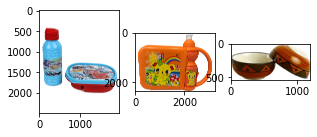

Baby Care


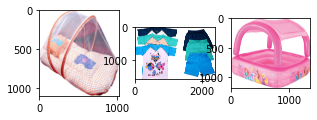

Watches


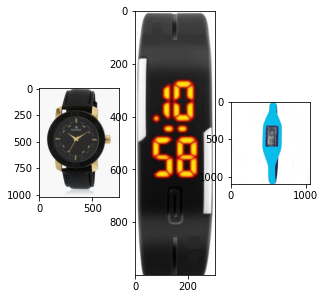

Computers


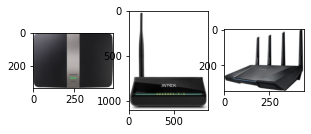

In [88]:
for category_name in categories_products :
    plt.figure(figsize=(10, 10))
    print(category_name)
    for i in range(3):
        plt.subplot(161 + i)
        filename = path + item_category(category_name)[i+10]
        image = imread(filename,'jpg')
        plt.imshow(image)
    plt.show()

#
# Sift

In [89]:
images = df4['image'].to_list()
images

['55b85ea15a1536d46b7190ad6fff8ce7.jpg',
 '7b72c92c2f6c40268628ec5f14c6d590.jpg',
 '64d5d4a258243731dc7bbb1eef49ad74.jpg',
 'd4684dcdc759dd9cdf41504698d737d8.jpg',
 '6325b6870c54cd47be6ebfbffa620ec7.jpg',
 '893aa5ed55f7cff2eccea7758d7a86bd.jpg',
 'f355cc1ccb08bd0d283ed979b7ee7515.jpg',
 'dd0e3470a7e6ed76fd69c2da27721041.jpg',
 '41384da51732c0b4df3de8f395714fbb.jpg',
 '710ed5f2393a4b9e8823aa0029f71f93.jpg',
 '920154acbe49d3202ed7d2ed2df1ea13.jpg',
 '08452abdadb3db1e686b94a9c52fc7b6.jpg',
 '1e8741b5ae27a513546c94b3f3312aee.jpg',
 '189fa66a5fa6f08d2802a62ecf0be298.jpg',
 'bbb8cdc5406ff60ff06ff64630f2ca47.jpg',
 '1120bc768623572513df956172ffefeb.jpg',
 '5479bb7028827d60000720a2c135976a.jpg',
 '733aa1e801a139fa8dc7be9f0eff5ee0.jpg',
 '62c35de4df27437d3597963fac55a8b6.jpg',
 '33d97d63c037078cd3f08033966d6a88.jpg',
 'd7ca2b06b4f4d3b98c61c377b18a2d6b.jpg',
 'f74476ba64365d97a5be7d375cbf4c7a.jpg',
 'fda50982a672ef8835de5c1cc86f8bfc.jpg',
 '4788f5466992da09024b8ffcc8a5cba4.jpg',
 '653826cd53f1d9

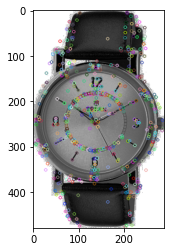

Descripteurs :  (621, 128)
[[ 95.  46.  46. ...  12.   5.   3.]
 [  0.   0.   0. ...   0.   1.   1.]
 [ 65. 125.  52. ...   6.   4.   3.]
 ...
 [  1.  86.  76. ...   0.   0.   0.]
 [  1.  49. 111. ...   0.   0.  52.]
 [  0.  97.  91. ...   0.   0.   3.]]


In [90]:
sift = cv2.SIFT_create()

image = cv2.imread(path + images[13],0) # Convert in gray
image = cv2.equalizeHist(image)   # Equalize image histogram

kp, descriptor = sift.detectAndCompute(image, None)

img=cv2.drawKeypoints(image, kp, image)

plt.imshow(img)
plt.show()

print("Descripteurs : ", descriptor.shape)
print(descriptor)

### Traitement des images

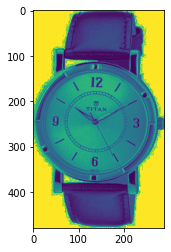

In [91]:
# Passage au gris et égalisation

image_0 = cv2.imread(path + images[11])

plt.imshow(image)
plt.show()

In [92]:
sift_keypoints = []
temps_0 = time.time()
sift = cv2.SIFT_create(650)

for image_id in range(650) :
    if image_id % 100 == 0 : print(image_id)
    image = cv2.imread(path + images[image_id],0)
    res = cv2.equalizeHist(image)   # Égalise l'histogramme de l'image
    kp, descriptor = sift.detectAndCompute(res, None)
    sift_keypoints.append(descriptor)

sift_keypoints_per_im = np.asarray(sift_keypoints)
sift_keypoints_all= np.concatenate(sift_keypoints, axis = 0)

print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration_0 = time.time() - temps_0
print("temps de traitement SIFT descriptor : ", duration_0, "secondes")

0
100
200
300
400
500
600
Nombre de descripteurs :  (408393, 128)
temps de traitement SIFT descriptor :  754.9130334854126 secondes


<ipython-input-92-3e91c5354b28>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_per_im = np.asarray(sift_keypoints)


# Calcul des clusters pour les descripteurs


#### Nombre de clusters


In [93]:
k = len(categories_products)

print(f"Nombre de clusters estimés :  {k}")

# Clustering


Nombre de clusters estimés :  7


#### Clusterings


In [94]:
temps_1 = time.time()

kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)


duration_1 = time.time() - temps_1
print("Temps de traitement KMeans : ", duration_1, "secondes")

Temps de traitement KMeans :  1.038661241531372 secondes


### Obtention des features


#### Création de la fonction Histogram


In [95]:
def histogram(kmeans, descript, image):
    pred = kmeans.predict(descript)
    histogramme = np.zeros(len(kmeans.cluster_centers_))
    descript_number = len(descript)
    if descript_number == 0 : print("Problème histogramme image  : ", image)
    for i in pred:
        histogramme[i] += (1.0/descript_number)
    return histogramme

#### Création de la matrice de l'histogramme


In [96]:
hist_vect = []
temps_2 = time.time()
for i, image_descriptor in enumerate(sift_keypoints_per_im):
    if i % 100 == 0 : print(i)  

# Calcul de l'histogramme
    hist = histogram(kmeans, image_descriptor, i) 

# Vecteur de l'histogramme
    hist_vect.append(hist) 

images_features = np.asarray(hist_vect)

duration_2 = time.time() - temps_2
print("Temps de création histogrammes : ", duration_2, "secondes")

0
100
200
300
400
500
600
Temps de création histogrammes :  0.9125566482543945 secondes


## Réduction de dimensions, decomposition et TSNE





#### Decomposition.PCA


In [97]:
df4

,image,primary_product_category_tree_
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care


In [98]:
df4.shape

(1050, 2)

In [99]:
images_features

array([[0.00461538, 0.01384615, 0.09692308, ..., 0.01230769, 0.10307692,
        0.00923077],
       [0.00921659, 0.11981567, 0.32258065, ..., 0.04761905, 0.22580645,
        0.03379416],
       [0.13846154, 0.44923077, 0.11846154, ..., 0.07538462, 0.13846154,
        0.05076923],
       ...,
       [0.05990783, 0.20737327, 0.13978495, ..., 0.29493088, 0.0906298 ,
        0.14900154],
       [0.36615385, 0.04153846, 0.09692308, ..., 0.13846154, 0.11076923,
        0.16      ],
       [0.14153846, 0.1       , 0.24461538, ..., 0.17538462, 0.18923077,
        0.12461538]])

In [100]:
images_features.shape

(650, 7)

In [101]:
print("Dimensions du dataset avant réduction PCA : ", images_features.shape)

pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(images_features)

print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions du dataset avant réduction PCA :  (650, 7)
Dimensions dataset après réduction PCA :  (650, 6)


In [102]:
feat_pca

array([[-1.41458748e-01, -1.85392445e-01, -4.01579417e-01,
         5.62309949e-01,  6.00803232e-02,  3.47425401e-02],
       [-2.28898527e-01, -2.05527674e-01, -1.39065930e-01,
         4.34812551e-02,  2.27792386e-02,  7.66840528e-03],
       [-9.35038224e-02,  1.71716719e-01, -1.84460556e-01,
        -1.83600976e-01, -4.55761457e-02, -3.16254924e-02],
       ...,
       [-1.42518912e-01,  1.26832186e-01,  8.70194242e-02,
         1.78016106e-02,  2.66452362e-02,  1.53875755e-02],
       [ 1.95149819e-01, -4.56681396e-02,  5.47939770e-02,
         3.94046738e-02, -2.93823220e-02, -6.63996041e-03],
       [-8.07976921e-02, -8.36962857e-02,  8.31157369e-02,
        -5.52507154e-02, -4.17611810e-05, -1.17013750e-02]])

#### Réduction de dimensions avec TSNE


In [103]:
TSNE = manifold.TSNE(n_components = 2,
                     perplexity = 30, 
                     n_iter = 2000, 
                     init = 'random', 
                     random_state = 0)

TSNE_ = TSNE.fit_transform(feat_pca)

TSNE_Dataframe = pd.DataFrame(TSNE_[:,0:2], columns=['TSNE_1', 'TSNE_2'])
TSNE_Dataframe["class"] = df4['primary_product_category_tree_'].iloc[:651]

print(TSNE_Dataframe.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(650, 3)


#### TSNE par catégories


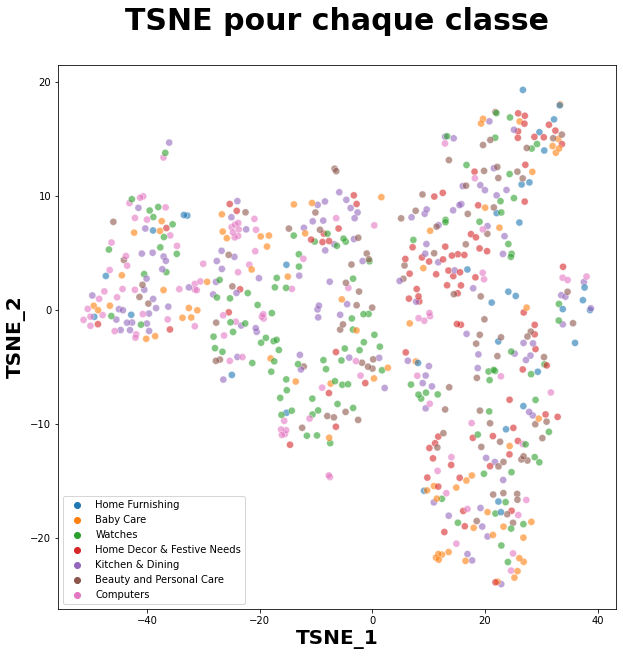

In [104]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = "TSNE_1", 
                y = "TSNE_2", 
                hue = "class", 
                data = TSNE_Dataframe, 
                legend = "brief",
                palette = sns.color_palette('tab10', n_colors = 7), 
                s = 50, 
                alpha = 0.6)

plt.title('TSNE pour chaque classe', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('TSNE_1', fontsize = 20, fontweight = 'bold')
plt.ylabel('TSNE_2', fontsize = 20, fontweight = 'bold')
plt.legend(prop = {'size': 10}) 

plt.show()

## Similarité entre cluster et catégories


#### Affichage des images par cluster et calcul ARI

---




In [105]:
clust = cluster.KMeans(n_clusters = 7, random_state = 6)
clust.fit(TSNE_)

TSNE_Dataframe["cluster"] = clust.labels_
print(TSNE_Dataframe.shape)

(650, 4)


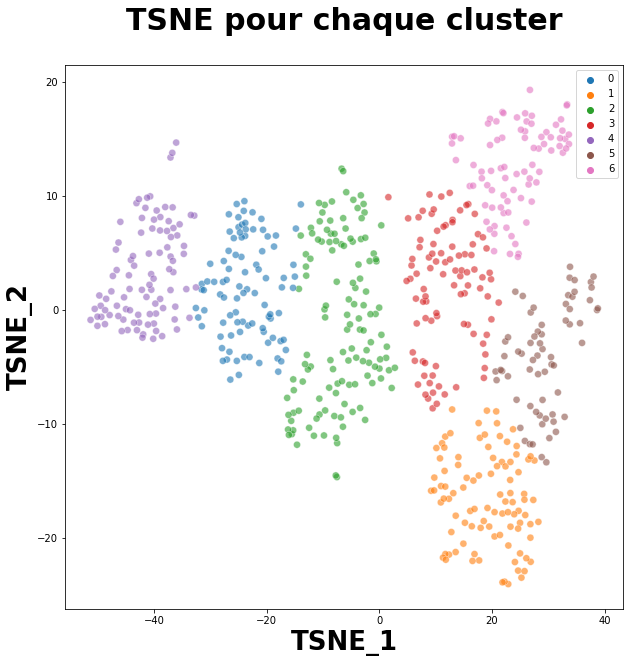

ARI :  0.03487762789399537


In [106]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = "TSNE_1", 
                y = "TSNE_2",
                hue = "cluster",
                palette = sns.color_palette('tab10', n_colors = 7), 
                s = 50, alpha = 0.6,
                data = TSNE_Dataframe.iloc[:651],
                legend = "brief")

plt.title('TSNE pour chaque cluster', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('TSNE_1', fontsize = 26, fontweight = 'bold')
plt.ylabel('TSNE_2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 10}) 

plt.show()


labels = df4["primary_product_category_tree_"][:650]
print("ARI : ", metrics.adjusted_rand_score(labels, clust.labels_))

#### Analyse des classes

---




In [107]:
TSNE_Dataframe

,TSNE_1,TSNE_2,class,cluster
0,38.659756,-0.037374,Home Furnishing,5
1,26.163671,16.512487,Baby Care,6
2,26.832952,-20.009172,Baby Care,1
3,29.675085,15.569621,Home Furnishing,6
4,26.744905,19.279654,Home Furnishing,6
...,...,...,...,...
645,19.309074,16.331385,Baby Care,6
646,-37.398483,7.761211,Baby Care,4
647,14.915983,-15.611768,Baby Care,1
648,-29.320652,2.438750,Baby Care,0


In [108]:
TSNE_Dataframe.groupby('cluster').count()['class']

cluster
0     92
1     97
2    128
3     93
4     93
5     66
6     81
Name: class, dtype: int64

In [109]:
labels

0                 Home Furnishing
1                       Baby Care
2                       Baby Care
3                 Home Furnishing
4                 Home Furnishing
                  ...            
645                     Baby Care
646                     Baby Care
647                     Baby Care
648                     Baby Care
649    Home Decor & Festive Needs
Name: primary_product_category_tree_, Length: 650, dtype: object

In [110]:
category_labels = LabelEncoder().fit_transform(TSNE_Dataframe['class'])
category_labels

array([4, 0, 0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 3, 5, 5, 4, 0, 4, 0, 1,
       5, 5, 5, 2, 5, 1, 5, 2, 5, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 5, 5,
       0, 4, 5, 5, 5, 4, 5, 0, 0, 0, 1, 1, 4, 0, 3, 3, 0, 0, 3, 3, 5, 2,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 4, 4, 4, 0, 4, 4, 4,
       0, 3, 0, 5, 0, 2, 3, 0, 3, 2, 4, 0, 2, 3, 1, 1, 1, 1, 3, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5,
       3, 5, 3, 3, 0, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       0, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 5, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 3, 5, 3, 5, 5, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3,
       3, 3, 5, 5, 5, 3, 3, 3, 3, 5, 5, 0, 6, 6, 6, 6, 6, 4, 0, 6, 3, 6,
       6, 4, 0, 3, 3, 0, 0, 0, 0, 5, 2, 0, 5, 3, 5,

In [111]:
clust.labels_

array([5, 6, 1, 6, 6, 6, 5, 6, 2, 2, 2, 6, 1, 2, 4, 5, 4, 1, 5, 1, 6, 2,
       2, 5, 2, 2, 2, 2, 2, 5, 2, 1, 0, 5, 0, 6, 0, 2, 1, 4, 1, 3, 4, 3,
       4, 2, 0, 2, 2, 3, 2, 0, 5, 0, 0, 0, 0, 3, 3, 5, 6, 3, 3, 1, 1, 1,
       4, 4, 0, 1, 4, 4, 4, 6, 6, 6, 6, 3, 6, 2, 4, 6, 1, 1, 2, 3, 2, 3,
       5, 3, 2, 6, 3, 3, 5, 6, 0, 5, 0, 6, 5, 1, 3, 6, 5, 6, 2, 1, 1, 6,
       6, 1, 4, 2, 0, 1, 2, 2, 5, 5, 5, 0, 0, 1, 4, 2, 3, 6, 3, 3, 0, 3,
       6, 4, 6, 3, 3, 5, 6, 3, 6, 2, 4, 3, 2, 3, 1, 2, 4, 1, 6, 6, 2, 0,
       4, 3, 5, 5, 3, 2, 3, 5, 3, 3, 4, 4, 2, 6, 5, 3, 3, 2, 4, 4, 2, 2,
       1, 6, 3, 2, 6, 1, 1, 4, 5, 3, 4, 1, 2, 4, 0, 2, 0, 3, 4, 0, 1, 4,
       5, 2, 3, 3, 0, 5, 2, 3, 1, 3, 6, 3, 3, 1, 2, 6, 3, 0, 2, 6, 2, 5,
       1, 2, 3, 0, 3, 2, 3, 3, 3, 6, 3, 2, 6, 6, 0, 4, 1, 3, 5, 6, 0, 0,
       3, 4, 5, 3, 6, 0, 6, 4, 0, 6, 4, 3, 3, 1, 5, 2, 1, 3, 5, 4, 3, 3,
       1, 6, 0, 0, 0, 1, 3, 5, 5, 6, 4, 0, 2, 1, 2, 6, 1, 3, 4, 5, 2, 1,
       0, 6, 0, 1, 1, 0, 1, 2, 6, 3, 2, 1, 3, 3, 5,

In [112]:
len(clust.labels_)

650

In [113]:
confusion_matrice = metrics.confusion_matrix(category_labels, clust.labels_)
confusion_matrice

array([[14, 24,  9,  5, 11,  2, 11],
       [ 7, 19, 24, 16,  5, 10, 15],
       [26, 10, 16,  8, 29,  6,  3],
       [ 4, 17, 12, 30,  3, 12, 15],
       [ 2,  4,  1,  3,  6, 10,  9],
       [16, 11, 26, 23, 25, 12, 13],
       [23, 12, 40,  8, 14, 14, 15]])

In [114]:
simi = np.argmax(confusion_matrice, axis = 0)
simi

array([2, 0, 6, 3, 2, 6, 1])

In [115]:
def transform_confusion_matrice(y, y_pred) :
    confusion_mat = metrics.confusion_matrix(y, y_pred)
    
    simi
    print ("Correspondance des clusters : ", simi)

    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)

    labels_0 = pd.Series(y, name = "y").to_frame()
    labels_0['y_pred'] = y_pred
    labels_0['y_pred_transformed'] = labels_0['y_pred'].apply(lambda x : simi[x]) 
    
    return labels_0['y_pred_transformed']

In [116]:
cluster_labels_transformed = transform_confusion_matrice(category_labels, clust.labels_)
confusion_matrice_0 = metrics.confusion_matrix(category_labels, cluster_labels_transformed)
print(confusion_matrice_0)
print()
print(metrics.classification_report(category_labels, cluster_labels_transformed))


Correspondance des clusters :  [2 0 6 3 2 6 1]
[[24 11 25  5  0  0 11]
 [19 15 12 16  0  0 34]
 [10  3 55  8  0  0 22]
 [17 15  7 30  0  0 24]
 [ 4  9  8  3  0  0 11]
 [11 13 41 23  0  0 38]
 [12 15 37  8  0  0 54]]

              precision    recall  f1-score   support

           0       0.25      0.32      0.28        76
           1       0.19      0.16      0.17        96
           2       0.30      0.56      0.39        98
           3       0.32      0.32      0.32        93
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00       126
           6       0.28      0.43      0.34       126

    accuracy                           0.27       650
   macro avg       0.19      0.25      0.21       650
weighted avg       0.20      0.27      0.23       650



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion matrix

---




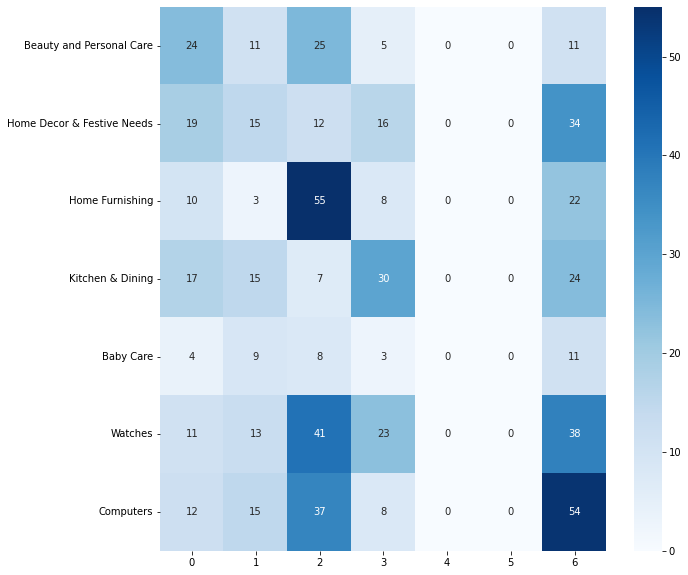

In [117]:
confusion_matrix_dataframe = pd.DataFrame(confusion_matrice_0, 
                     index = [label for label in categories_products],
                     columns = [i for i in "0123456"])

plt.figure(figsize = (10 ,10))
sns.heatmap(confusion_matrix_dataframe, annot = True, cmap = "Blues")
plt.show()

## Transfer Learning

---




### CNN Pre-trained VGG16 Model (ImageNet)

---




#### VGG16 Sans classifier

---




In [118]:
vgg_model = VGG16(weights = 'imagenet', 
                  include_top = False,
                  input_shape = (224, 224, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [119]:
vgg_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [120]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [121]:
vgg16_model = Model(inputs = vgg_model.input, outputs = Flatten()(vgg_model.output))

In [122]:
vgg16_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [123]:
# Traitement des images qui doivent être redimensionnées et preprocessées

images_list = []

for image in range(len(images)):
  if image %100 == 0:
    print(image)
  image_load = load_img(path + images[image],
                        target_size = (224, 224))
  image_array = img_to_array(image_load)
  images_list.append(image_array)

images_list = np.asarray(images_list)
images_list = preprocess_input(images_list)

0
100
200
300
400
500
600


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:2797: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


In [124]:
images_list

array([[[[  88.061     ,   87.221     ,   82.32      ],
         [  87.061     ,   86.221     ,   81.32      ],
         [  89.061     ,   85.221     ,   81.32      ],
         ...,
         [  53.060997  ,   49.221     ,   51.32      ],
         [  54.060997  ,   50.221     ,   52.32      ],
         [  53.060997  ,   49.221     ,   51.32      ]],

        [[  99.061     ,   91.221     ,   83.32      ],
         [  97.061     ,   89.221     ,   83.32      ],
         [  98.061     ,   90.221     ,   84.32      ],
         ...,
         [  56.060997  ,   52.221     ,   54.32      ],
         [  54.060997  ,   50.221     ,   52.32      ],
         [  55.060997  ,   51.221     ,   53.32      ]],

        [[  99.061     ,   90.221     ,   84.32      ],
         [ 103.061     ,   92.221     ,   86.32      ],
         [ 103.061     ,   92.221     ,   86.32      ],
         ...,
         [  55.060997  ,   51.221     ,   53.32      ],
         [  56.060997  ,   52.221     ,   54.32      ],
  

In [125]:
images_list.shape

(1050, 224, 224, 3)

In [126]:
# Détermination des features
features_images = vgg16_model.predict(images_list)

33/33 [==============================] - 685s 21s/step


In [127]:
features_images.shape

(1050, 25088)

In [128]:
ARI_5, X_tsne_5, labels_5 = ARI_funct(features_images)

ARI :  0.2947 time :  26.0


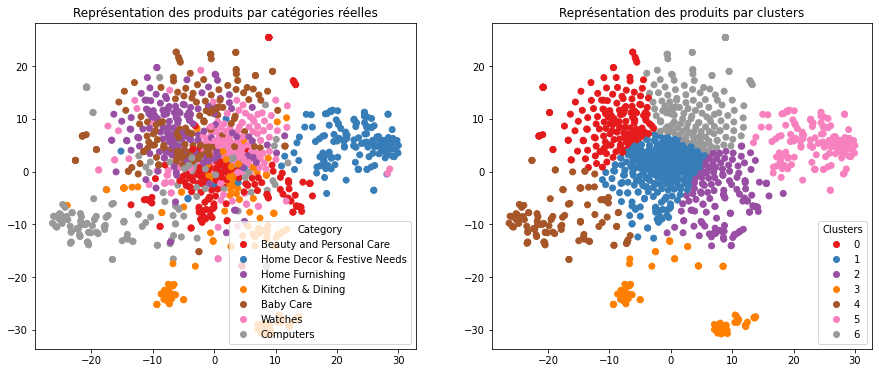

ARI :  0.2947


In [129]:
TSNE_display(ARI_5, X_tsne_5, category_number, labels_5)

#### Traitements des données de test sans entrainement des couches de convolutions 

---




In [171]:
df4['numero_categorie'] = LabelEncoder().fit_transform(df4['primary_product_category_tree_'])
df4


<ipython-input-171-f60c645f6eaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['numero_categorie'] = LabelEncoder().fit_transform(df4['primary_product_category_tree_'])


,image,primary_product_category_tree_,numero_categorie
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,0
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,0
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,0


In [172]:
X_train, X_test, y_train, y_test = train_test_split(images_list, 
                                                    df4['numero_categorie'],
                                                    train_size = 0.8,
                                                    stratify = df4['numero_categorie'],
                                                    random_state = 50)

In [178]:
X_train.shape


(840, 224, 224, 3)

In [179]:
y_train.value_counts()

4    120
1    120
0    120
2    120
5    120
6    120
3    120
Name: numero_categorie, dtype: int64

In [198]:
y_train_to_c = to_categorical(y_train, num_classes = 7)
y_test_to_c = to_categorical(y_test, num_classes = 7)

In [181]:
# Analyse sur les données test sans entrainement des couches de convolution
features_images_without_conv = vgg16_model.predict(X_test)


7/7 [==============================] - 139s 19s/step


In [182]:
def ARII_funct(features, category_number) :
    time1 = time.time()
    num_labels = len(categ)
    tsne = manifold.TSNE(n_components = 2,
                         perplexity = 30,
                         n_iter = 2000,
                         init = 'random',
                         learning_rate = 200,
                         random_state = 50)

    X_tsne = tsne.fit_transform(features)


    # Détermination des clusters à partir des données après Tsne

    clust_km = cluster.KMeans(n_clusters = num_labels,
                         n_init = 100,
                         random_state = 50)
    clust_km.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(category_number, clust_km.labels_),4)
    time2 = np.round(time.time() - time1, 0)
    print("ARI : ", ARI, "time : ", time2)

    return ARI, X_tsne, clust_km.labels_

In [183]:
ARI_6, X_tsne_6, labels_6 = ARII_funct(features_images_without_conv, y_test)

ARI :  0.2416 time :  18.0


#### Avec entrainement des couches de convolutions

---




In [186]:
vgg_16_model = VGG16(weights = 'imagenet', 
                     include_top = False, 
                     input_shape = (224, 224, 3))

for layer in vgg_16_model.layers[:-6]:
  layer.trainable = False





In [188]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation = 'relu')
dense_layer_2 = layers.Dense(20, activation = 'relu')
prediction_layer = layers.Dense(7, activation = 'softmax')

model = models.Sequential([vgg_16_model, flatten_layer, dense_layer_1, dense_layer_2, prediction_layer])

In [193]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = optimizers.SGD(learning_rate = 0.0001, momentum = 0.9),
              metrics = ['accuracy'])

In [194]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 50)                1254450   
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dense_7 (Dense)             (None, 7)                 147       
                                                                 
Total params: 15,970,305
Trainable params: 10,694,849
Non-trainable params: 5,275,456
_________________________________________________________________


In [196]:
# On entraine le modèle

model.fit(X_train, y_train_to_c, epochs = 4, batch_size = 20)

Epoch 1/4
42/42 [==============================] - 770s 18s/step - loss: 0.7432 - accuracy: 0.7345
Epoch 2/4
42/42 [==============================] - 765s 18s/step - loss: 0.3744 - accuracy: 0.8679
Epoch 3/4
42/42 [==============================] - 780s 19s/step - loss: 0.1874 - accuracy: 0.9429
Epoch 4/4
42/42 [==============================] - 783s 19s/step - loss: 0.0963 - accuracy: 0.9762


In [199]:
model.evaluate(X_test, y_test_to_c)

7/7 [==============================] - 139s 19s/step - loss: 1.2243 - accuracy: 0.6905


[1.2243422269821167, 0.6904761791229248]

In [200]:
# On compare les résutats avec le modèle initial (vgg_16_model)
# vgg_16_model : les couches de convolution sont entrainées
features_images_with_conv = vgg_16_model.predict(X_test)

7/7 [==============================] - 138s 19s/step


In [201]:
# Obtention des vecteurs par image

features_images_with_conv = np.asarray([features_images_with_conv[i].flatten() for i in range(features_images_with_conv.shape[0])]) 

In [202]:
ARI_7, X_tsne_7, labels_7 = ARII_funct(features_images_with_conv, y_test)

ARI :  0.2752 time :  4.0
